In [5]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('D:\MiniProyectos_Python\Birthrate-Analysis')

In [39]:
df_births=pd.read_csv("births.csv")
df_births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [40]:
df_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


**Verificando valores nulos**

In [41]:
df_births.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [42]:
df_births['day'].fillna(0, inplace=True)

In [43]:
df_births['day']=df_births['day'].astype('int64')

In [44]:
df_births['decade'] = 10 * (df_births['year']//10)

In [45]:
df_births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


**Tabla pivote (gender/decade)- nos permite observar la cantidad de nacimientos dados por decada y por sexo**

In [46]:
df_births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


**Para visualizar mejor generamos una gráfica**

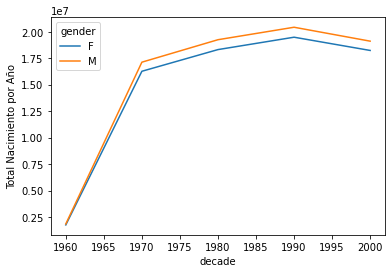

In [47]:
graficaNacimiento=df_births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
graficaNacimiento.plot()
plt.ylabel('Total Nacimiento por Año')
plt.show()

# Exploración adicional de datos

**Iniciamos con una limpieza de valores atipicos generados por posibles fechas mal escritas**

    Aplicando el recorte Sigma

In [51]:
quartiles = np.percentile(df_births['births'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0]) # 0,74 proviene del rango intercuartílico de una distribución gaussiana


In [57]:
births=df_births

In [58]:
df_births=df_births.query('(births>@mean - 5 * @sigma) & (births< @mean + 5*@sigma)')

In [60]:
df_births.index=pd.to_datetime(10000*df_births.year + 100*df_births.month + df_births.day, format='%Y%m%d')

In [66]:
df_births['dia_Semana']=df_births.index.dayofweek

<ipython-input-66-f53af6a5c558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_births['dia_Semana']=df_births.index.dayofweek


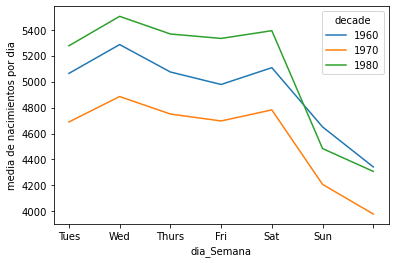

In [65]:
df_births.pivot_table('births', index='dia_Semana',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Media de nacimientos por dia');
plt.show()

In [72]:
births_month = df_births.pivot_table('births', [df_births.index.month, df_births.index.day])
print(births_month)



         births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]


In [84]:
births_month = df_births.pivot_table('births', [df_births.index.month, df_births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2000, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
1980-01-01  4009.225
1980-01-02  4247.400
1980-01-03  4500.900
1980-01-04  4571.350
1980-01-05  4603.625


<ipython-input-84-391b7b657ccd>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(1980, month, day)


**Centrándonos solo en el mes y el día, ahora tenemos una serie de tiempo que refleja el número promedio de nacimientos por 
fecha del año. A partir de esto, podemos usar el método de trazado para trazar los datos. Revela algunas tendencias interesantes:**

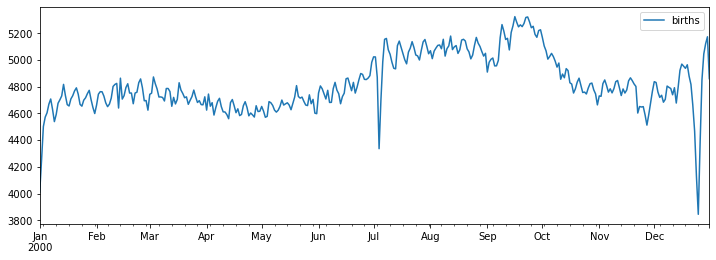

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()